In [194]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from datetime import date
sns.set()
%matplotlib inline

In [195]:
sns.set_style("whitegrid")

In [196]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn import preprocessing

In [197]:
import pwlf

In [198]:
plt.rcParams['figure.figsize'] = [16, 9]

In [199]:
w = pd.read_csv(r'The revised 292 F - 2018-12-31.csv',parse_dates=['Timestamp'], index_col='Timestamp')

In [200]:
w = (w - 32)/1.8
w = w.round(2)

In [201]:
e = pd.read_csv(r'afterQ295(Dec2).csv',parse_dates=['Timestamp'], index_col='Timestamp')

In [202]:
building_list = pd.read_excel('Revised startup and shutdown time all categories.xlsx', sheet_name='Office')
building_4A = building_list[building_list['Climate Zone'] == '4A']
buildings = building_4A['Building ID']

In [203]:
buildings = np.unique(buildings)

In [204]:
len(buildings)

37

In [205]:
buildings = buildings[buildings != 'MD0325ZZ']

In [206]:
building_info = pd.read_excel('extracted data of 295 buildings.xlsx',  index_col=0)

In [207]:
building_info['code']

0      AK0001ZZ
1      AK0013ZZ
2      AK0031AA
3      AL0003AC
4      AL0011ZZ
         ...   
290    IL0303ZZ
291    IL0311ZZ
292    IL2125ZZ
293    IN0031ZZ
294    KY0013ZZ
Name: code, Length: 295, dtype: object

## MD0205ZZ & MO0106ZZ, MO0134zz are deleted due to the electricity heating

In [208]:
segment = {'DC0010ZZ': 2,
           'DC0011ZZ': 2,
           'DC0021ZZ': 2,
           'DC0078ZZ': 2,
           'DC0313ZZ': 2,
           'DC0459AF': 2,
           'DC0463ZZ': 2,
           'DC0501BC': 2,
           'DC0505ZZ': 2,
           'MD0000HC': 2,
           'MD0334ZZ': 2,
           'MD0778AG': 2,
           'MO0000AF': 2,
           'MO0127ZZ': 2,
           'NC0002AE': 2,
           'PA0000AT': 2,
           'PA0144ZZ': 2,
           'VA0088ZZ': 2,
           'WV0054FP': 2,
           'WV0226ZZ': 2}

## Holiday and Problem days

'''Winter Jan, Feb
(2018, 1, 1), "New Year's Day") (Monday)
(2018, 1, 15), 'Martin Luther King Jr. Day') (Monday)
(2018, 2, 19), "Washington's Birthday") (Monday)
Spring Mar, Apr, May
(2018, 5, 28), 'Memorial Day') (Monday)
Summer Jun, Jul, Aug
(2018, 7, 4), 'Independence Day') (Wednesday)
Autumn Sep Oct Nov
(2018, 11, 12), 'Veterans Day (Observed)') (Monday)
(2018, 11, 22), 'Thanksgiving') (Thursday)'''

In [209]:
holidays = [
    date(2018, 1, 1),
    date(2018, 1, 15),
    date(2018, 2, 19),
    date(2018, 5, 28),
    date(2018, 7, 4),
    date(2018, 11, 12),
    date(2018, 11, 22),
    date(2018, 9, 3),
    date(2018, 10, 8),
    date(2018, 12, 5)
]

In [210]:
df_occ = pd.read_csv('4A 19 occupied lean detail.csv')

In [229]:
df_occ

building  balancePoint        slope1    slope2  intercept1  intercept2  \
0   DC0010ZZ     14.016265 -3.924219e-08  0.000013    0.000427    0.000237   
1   DC0011ZZ      2.309122 -3.629559e-06  0.000011    0.001066    0.001031   
2   DC0021ZZ     12.412967  2.178386e-07  0.000008    0.000296    0.000203   
3   DC0078ZZ      5.039718  2.267691e-06  0.000018    0.000655    0.000573   
4   DC0313ZZ     15.150630 -3.414838e-06  0.000020    0.000433    0.000075   
5   DC0459AF     15.242698  2.426238e-07  0.000006    0.000384    0.000301   
6   DC0463ZZ     15.962571 -4.555384e-07  0.000009    0.000656    0.000505   
7   DC0501BC     14.859628  1.586377e-06  0.000015    0.000410    0.000204   
8   DC0505ZZ     14.516218 -2.966838e-06  0.000015    0.000818    0.000556   
9   MD0000HC     12.753189 -2.569692e-06  0.000005    0.000793    0.000690   
10  MD0334ZZ     13.049403  2.144201e-06  0.000024    0.001068    0.000781   
11  MD0778AG     16.358919  2.046287e-06  0.000007    0.000356    0.000276   
12  MO0000AF     11.655918 -9.892513e-07  0.000004    0.000420    0.000366   
13  MO0127ZZ      9.260238 -3.124100e-07  0.000008    0.000386    0.000314   
14  NC0002AE     10.783904 -7.619616e-07  0.000010    0.000345    0.000230   
15  PA0000AT     11.777629 -6.570937e-07  0.000014    0.000907    0.000739   
16  PA0144ZZ     10.808140  5.568647e-07  0.000011    0.000357    0.000241   
17  VA0088ZZ     15.841636  1.769201e-06  0.000006    0.000247    0.000182   
18  WV0054FP      8.088403  2.709550e-06  0.000011    0.000383    0.000313   
19  WV0226ZZ     13.850868 -2.978434e-07  0.000010    0.000935    0.000797   

    baseLoad  
0   0.000427  
1   0.001080  
2   0.000296  
3   0.000649  
4   0.000424  
5   0.000385  
6   0.000655  
7   0.000414  
8   0.000812  
9   0.000789  
10  0.001071  
11  0.000362  
12  0.000419  
13  0.000386  
14  0.000344  
15  0.000906  
16  0.000357  
17  0.000252  
18  0.000380  
19  0.000934

In [213]:
df_occ['baseLoad'].median()

0.00042155330226064996

In [214]:
df_occ['baseLoad'].quantile(0.25)

0.00037594192807075

In [228]:
df_occ[df_occ['baseLoad'] > df_occ['baseLoad'].median()].building

0     DC0010ZZ
1     DC0011ZZ
3     DC0078ZZ
4     DC0313ZZ
6     DC0463ZZ
8     DC0505ZZ
9     MD0000HC
10    MD0334ZZ
15    PA0000AT
19    WV0226ZZ
Name: building, dtype: object

In [216]:
df_occ[df_occ['baseLoad'] > df_occ['baseLoad'].quantile(0.25)].building

0     DC0010ZZ
1     DC0011ZZ
3     DC0078ZZ
4     DC0313ZZ
5     DC0459AF
6     DC0463ZZ
7     DC0501BC
8     DC0505ZZ
9     MD0000HC
10    MD0334ZZ
12    MO0000AF
13    MO0127ZZ
15    PA0000AT
18    WV0054FP
19    WV0226ZZ
Name: building, dtype: object

Text(0.5, 1.0, 'WV0226ZZ')

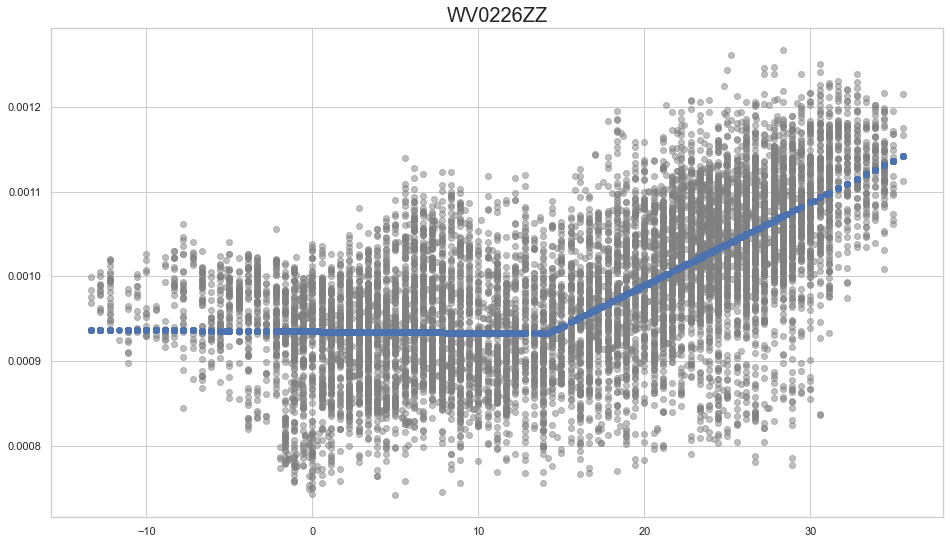

In [230]:
data = pd.DataFrame()
data['w'] = w['WV0226ZZ']
data['e'] = e['WV0226ZZ']
data = data.dropna()
data = data[~np.isin(data.index.date, holidays)]
data = data[data.index.weekday < 5].between_time('6:00', '18:00')

clustering = DBSCAN(eps=5, min_samples=8).fit(data)
res = np.unique(clustering.labels_, return_counts=True)
maj = res[0][np.argmax(res[1])]

data['e'] = data['e'] / (building_info['floor area (sf)'][building_info['code'] == 'WV0226ZZ'].values[0])

x, y = (data)['w'][clustering.labels_== maj], (data)['e'][clustering.labels_== maj]
f = pwlf.PiecewiseLinFit(x, y)
res = f.fit(segment['WV0226ZZ'])
plt.subplots()
plt.scatter((data)['w'][clustering.labels_== maj], (data)['e'][clustering.labels_== maj], c='gray', alpha=0.5)
plt.scatter(x, f.predict(x))
plt.title('WV0226ZZ', fontsize=20)

In [231]:
balance = f.fit_breaks[1]
a1, a2 = f.slopes
b1, b2 = f.intercepts
baseload = b1 + a1 * (-10 + balance)/2

In [232]:
baseload

0.0009345078153496126

In [233]:
df_occ['baseLoad'].median()

0.00042155330226064996

In [234]:
def fun1(x, balance):
    if x <= balance:
        return a1 * x + b1
    else:
        return a2 * x + b2

In [235]:
def fun2(x, balance ,new_baseload):
    delta = baseload - new_baseload
    if x <= balance:
        return a1 * x + b1 - delta
    else:
        return a2 * x + b2 - delta

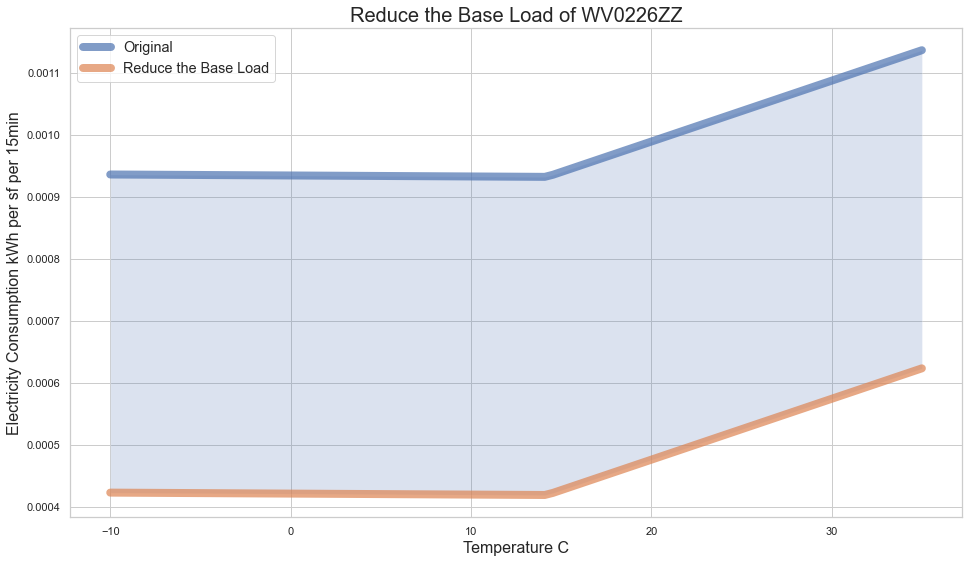

In [240]:
x = np.linspace(-10, 35, 100)
plt.plot(x, [fun1(xi, balance) for xi in x], alpha=0.7, lw=8, label='Original')
plt.plot(x, [fun2(xi, balance, df_occ['baseLoad'].median()) for xi in x], alpha=0.7, lw=8, label='Reduce the Base Load')
plt.fill_between(x, [fun1(xi, balance) for xi in x], [fun2(xi, balance, df_occ['baseLoad'].median()) for xi in x], alpha=0.2)
plt.ylabel('Electricity Consumption kWh per sf per 15min', fontsize=16)
plt.xlabel('Temperature C', fontsize=16)
plt.title('Reduce the Base Load of WV0226ZZ', fontsize=20)
plt.legend(fontsize='x-large')

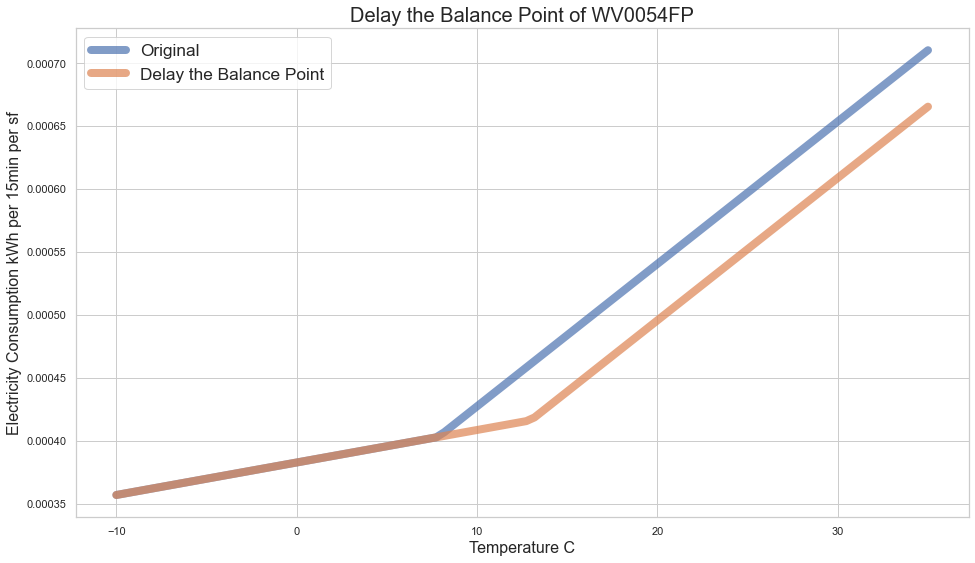

In [153]:
x = np.linspace(-10, 35, 100)
plt.plot(x, [fun1(xi, balance) for xi in x], alpha=0.7, lw=8, label='Original')
plt.plot(x, [fun2(xi, balance, df_occ['balancePoint'].median()) for xi in x], alpha=0.7, lw=8, label='Delay the Balance Point')
# plt.fill_between(x, [fun1(xi, balance) for xi in x], [fun2(xi, balance, df_occ['balancePoint'].median()) for xi in x], alpha=0.2)
plt.ylabel('Electricity Consumption kWh per 15min per sf', fontsize=16)
plt.xlabel('Temperature C', fontsize=16)
plt.title('Delay the Balance Point of WV0054FP', fontsize=20)
plt.legend(fontsize='xx-large')

In [41]:
a = sum([fun2(xi, balance, df_occ['balancePoint'].median()) for xi in (data)['w']])

In [42]:
b = sum([fun1(xi, balance) for xi in (data)['w']])

In [43]:
a_ = a * (building_info['floor area (sf)'][building_info['code'] == 'WV0054FP'].values[0])

In [44]:
b_ = b * (building_info['floor area (sf)'][building_info['code'] == 'WV0054FP'].values[0])

In [45]:
round(100 * ((b_ - a_)/b_), 2)

5.53

In [243]:
def fun1(x, balance, a1, b1, a2, b2):
    if x <= balance:
        return a1 * x + b1
    else:
        return a2 * x + b2

In [244]:
def fun2(x, balance ,baseload_new, a1, b1, a2, b2):
    baseload = b1 + a1 * (-10 + balance)/2
    delta = baseload - baseload_new
    if x <= balance:
        return a1 * x + b1 - delta
    else:
        return a2 * x + b2 - delta

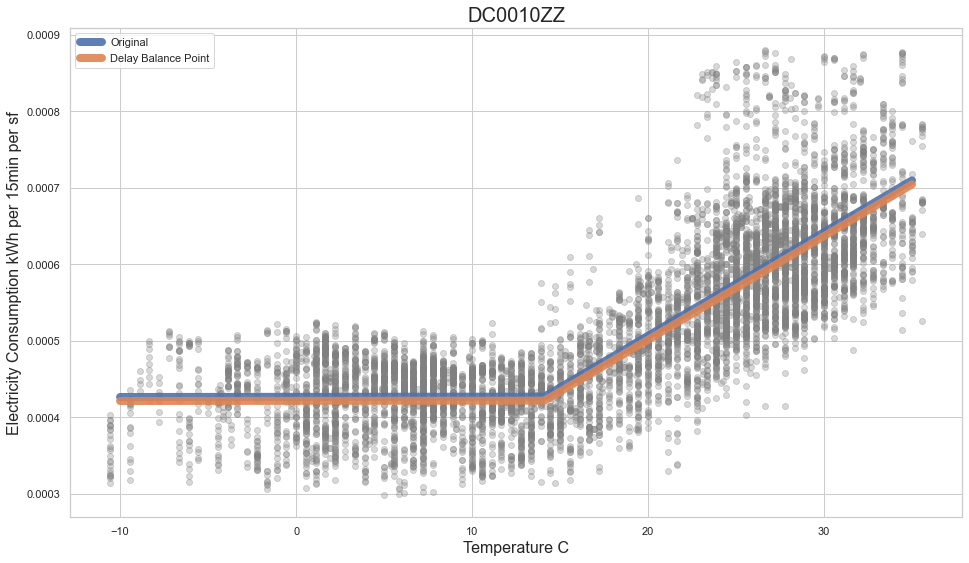

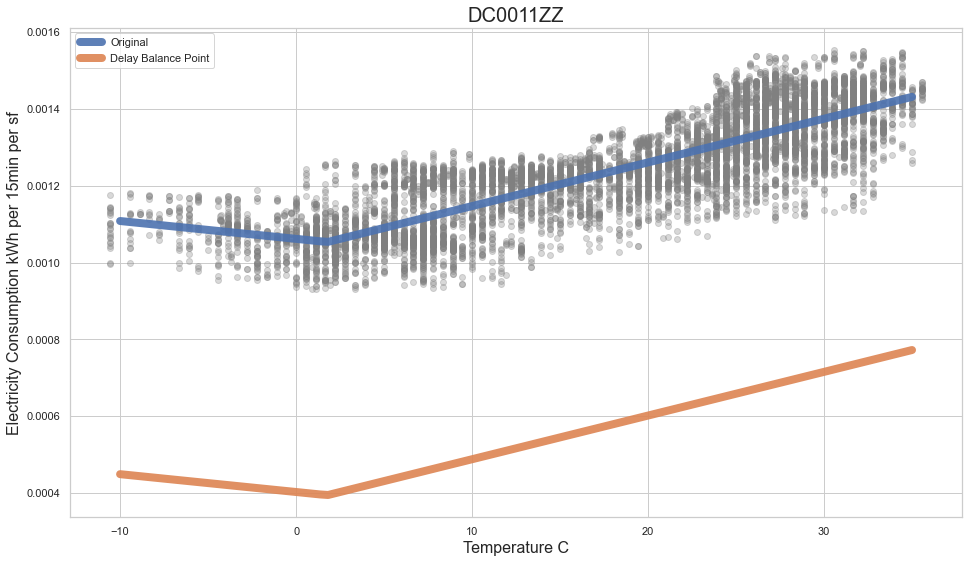

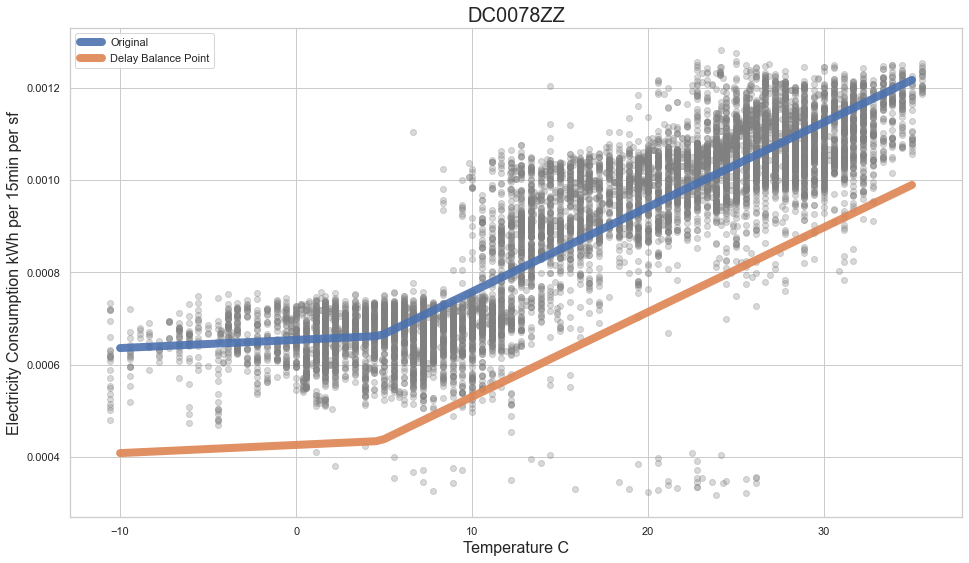

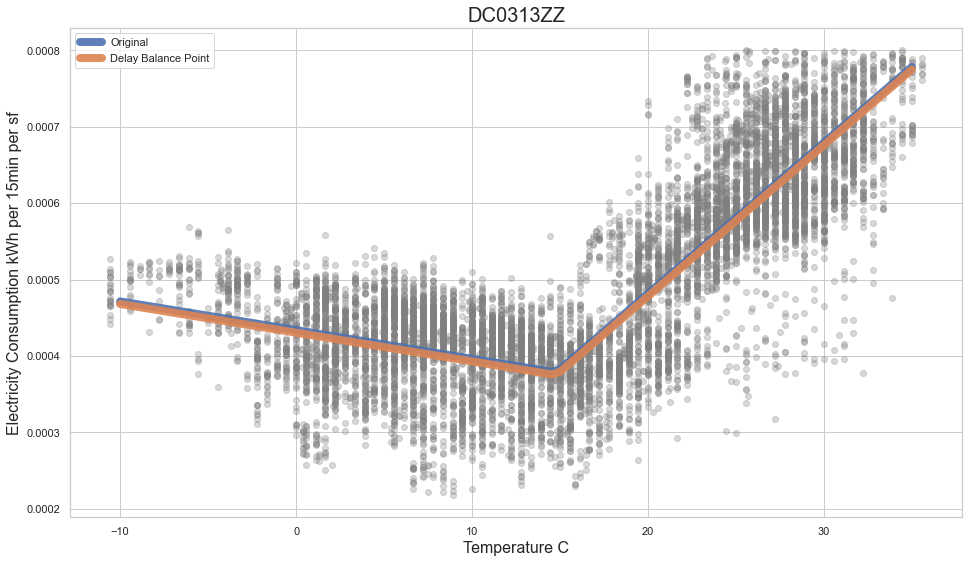

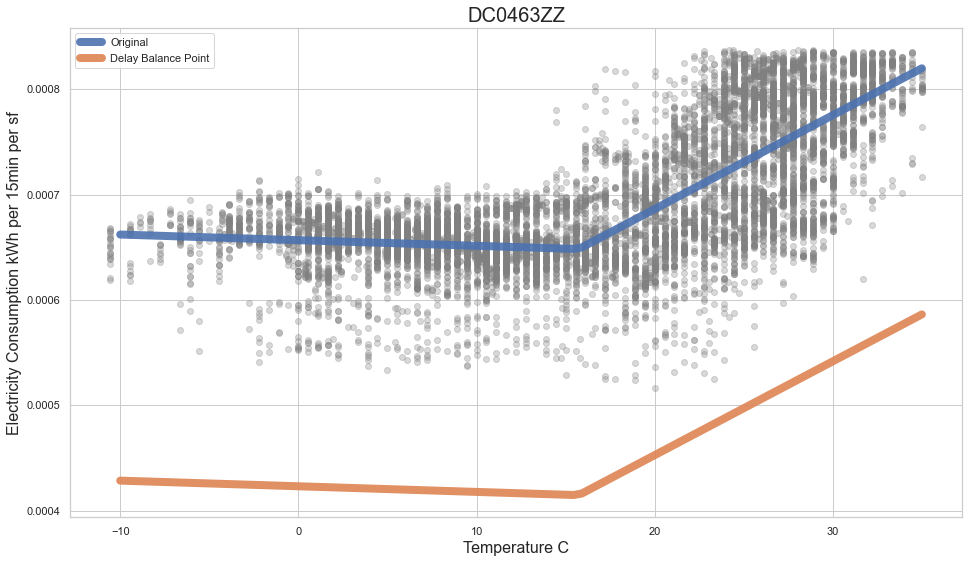

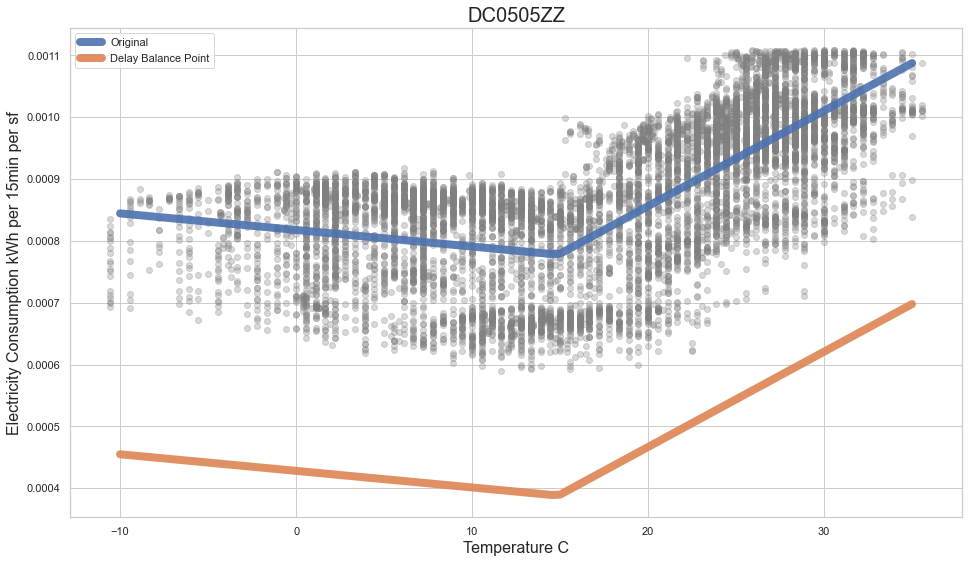

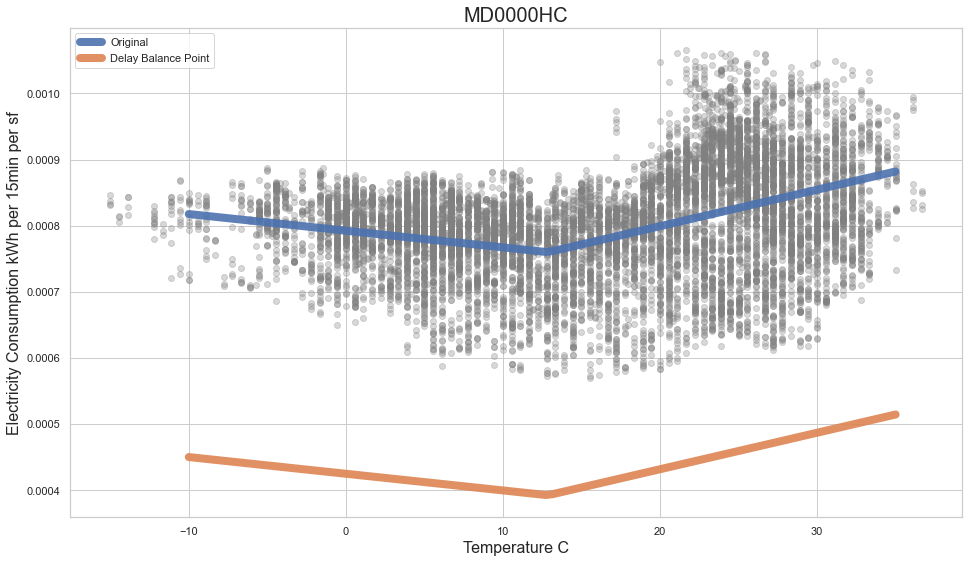

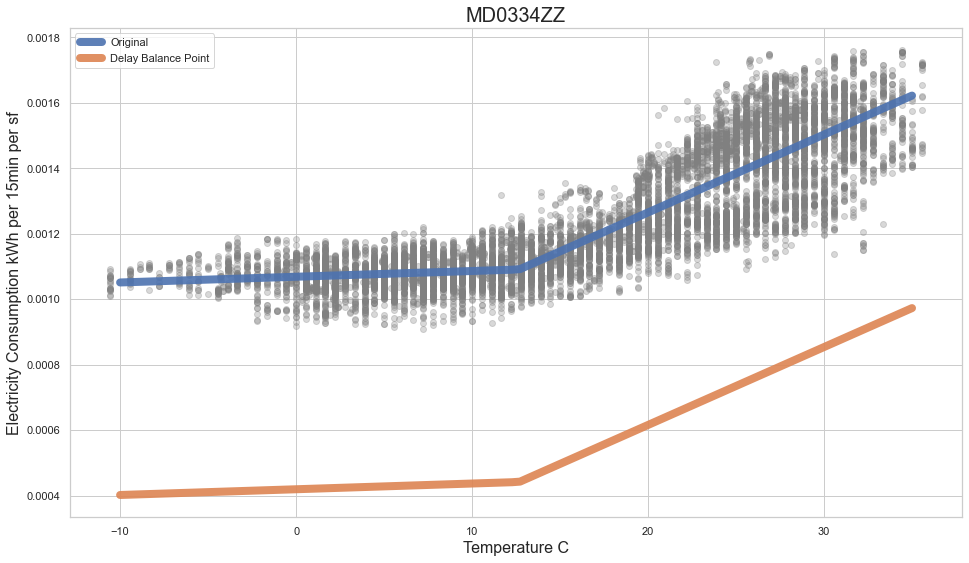

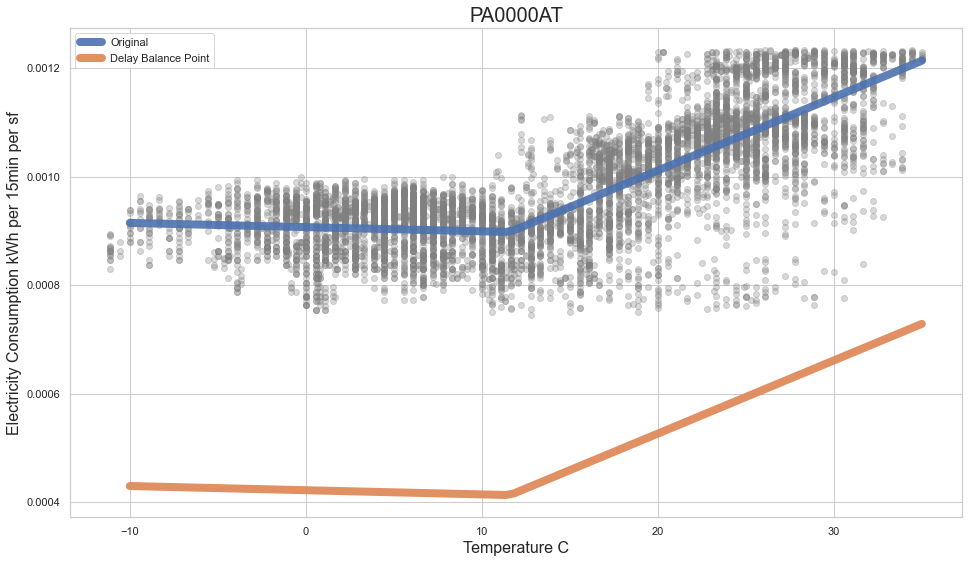

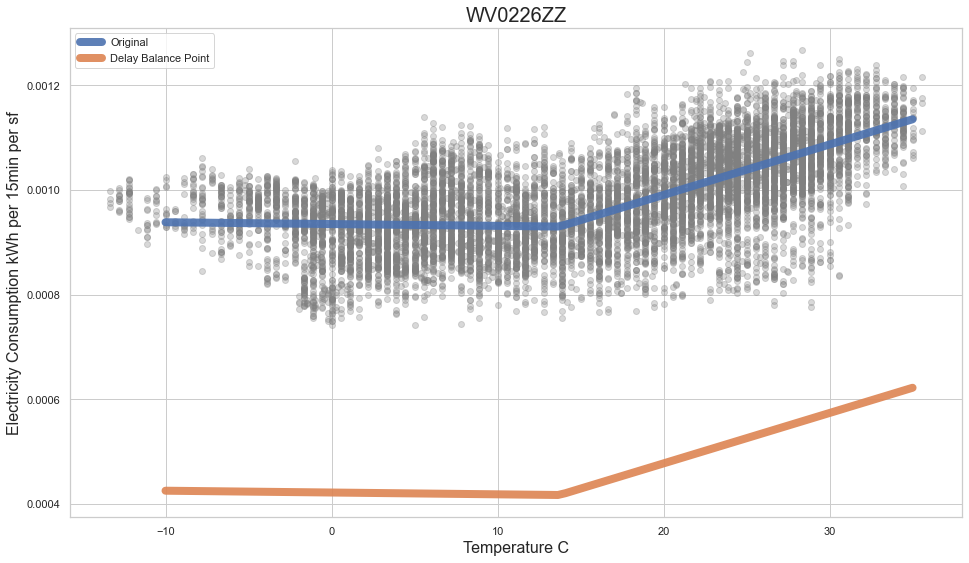

In [246]:
for i in df_occ[df_occ['baseLoad'] > df_occ['baseLoad'].median()].building:
    data = pd.DataFrame()
    data['w'] = w[i]
    data['e'] = e[i]
    data = data.dropna()
    data = data[~np.isin(data.index.date, holidays)]
    data = data[data.index.weekday < 5].between_time('6:00', '18:00')
    
    clustering = DBSCAN(eps=5, min_samples=8).fit(data)
    res = np.unique(clustering.labels_, return_counts=True)
    maj = res[0][np.argmax(res[1])]
    
    data['e'] = data['e'] / (building_info['floor area (sf)'][building_info['code'] == i].values[0])
    
    x, y = (data)['w'][clustering.labels_== maj], (data)['e'][clustering.labels_== maj]
    f = pwlf.PiecewiseLinFit(x, y)
    res = f.fit(segment[i])
    plt.subplots()
    plt.scatter((data)['w'][clustering.labels_== maj], (data)['e'][clustering.labels_== maj], c='grey', alpha=0.3)
#     plt.scatter((data)['w'][clustering.labels_== maj], f.predict((data)['w'][clustering.labels_== maj]), c='blue', alpha=0.3)
    _, balancePoint, _ = f.fit_breaks
    a1, a2 = f.slopes
    b1, b2 = f.intercepts
#     plt.scatter((data)['w'][clustering.labels_== maj], [fun2(i, balancePoint, df_occ['balancePoint'].median(), a1, b1, a2, b2) for i in (data)['w'][clustering.labels_== maj]], c='red', alpha=0.3)
    plt.title(f'{i}', fontsize=20)
    x = np.linspace(-10, 35, 100)
    plt.plot(x, [fun1(i, balancePoint, a1, b1, a2, b2) for i in x], label='Original',alpha=0.9, lw=8)
    plt.plot(x, [fun2(i, balancePoint, df_occ['baseLoad'].median(), a1, b1, a2, b2) for i in x], label='Delay Balance Point',alpha=0.9, lw=8)
    plt.ylabel('Electricity Consumption kWh per 15min per sf', fontsize=16)
    plt.xlabel('Temperature C', fontsize=16)
    plt.legend()



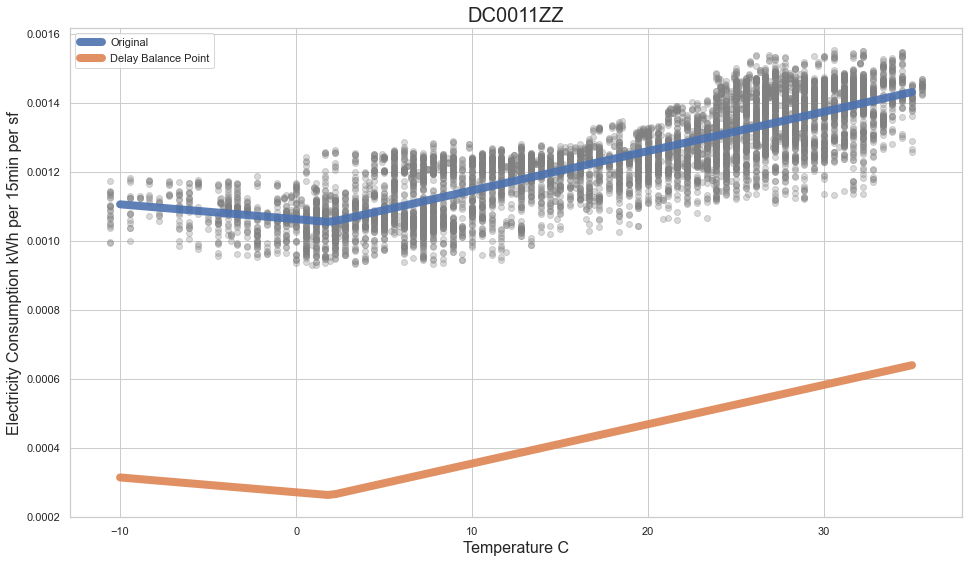

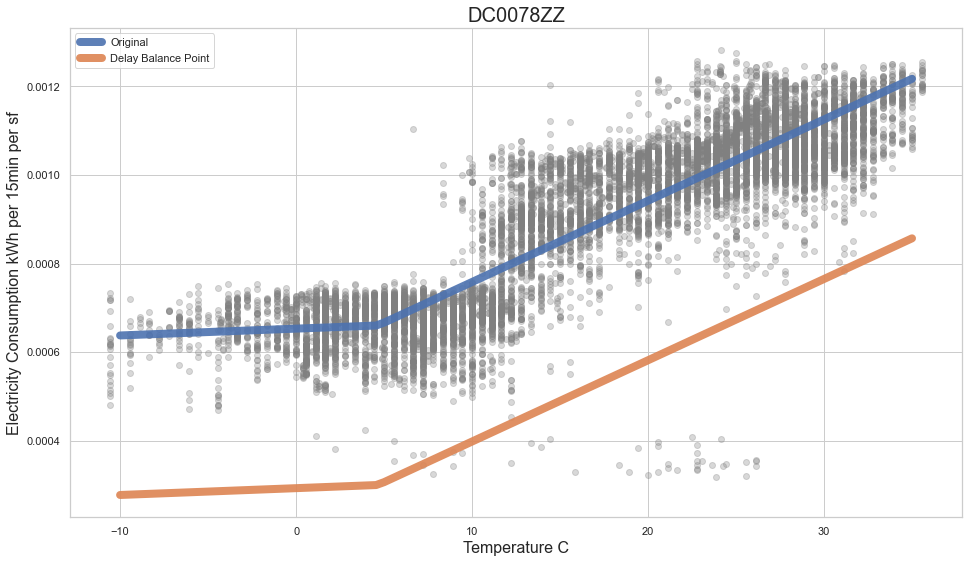

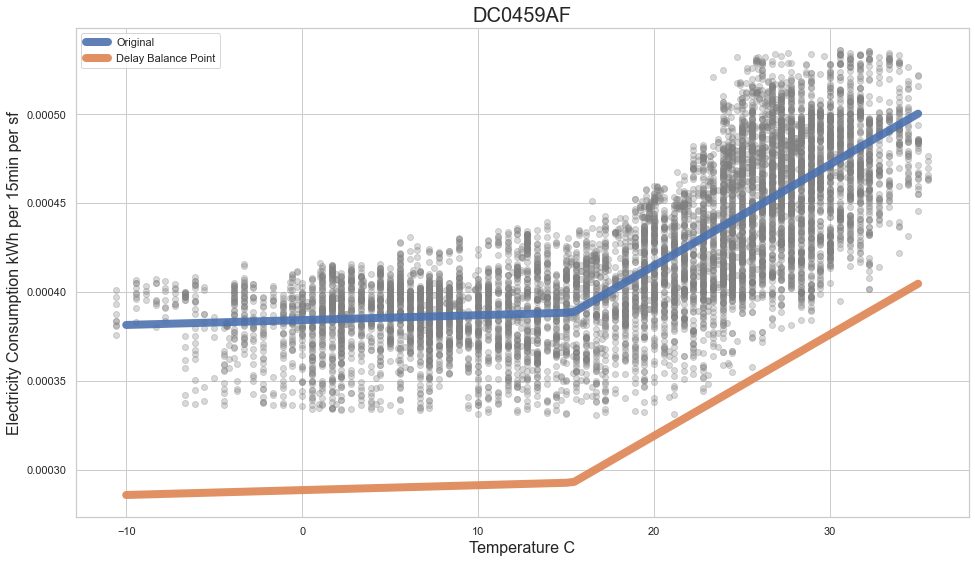

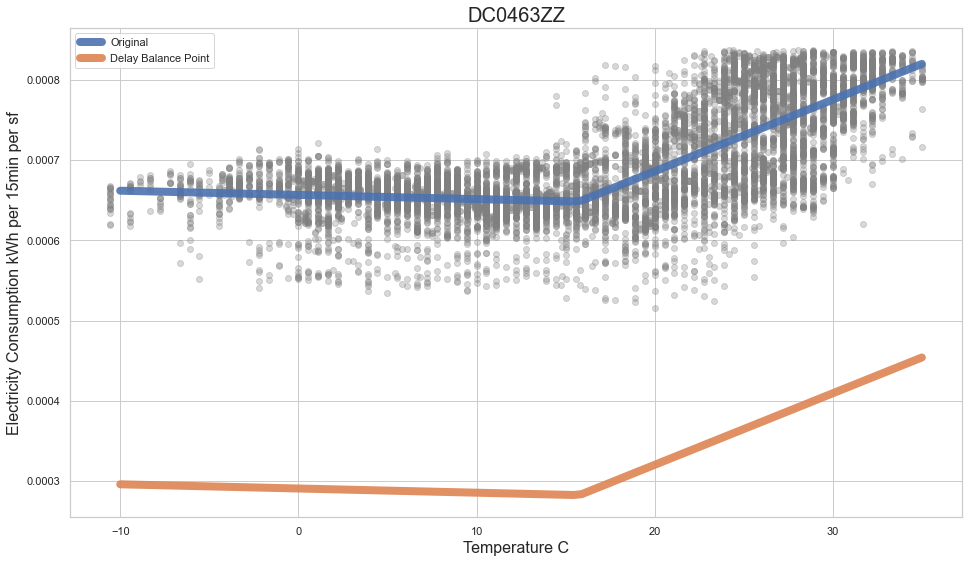

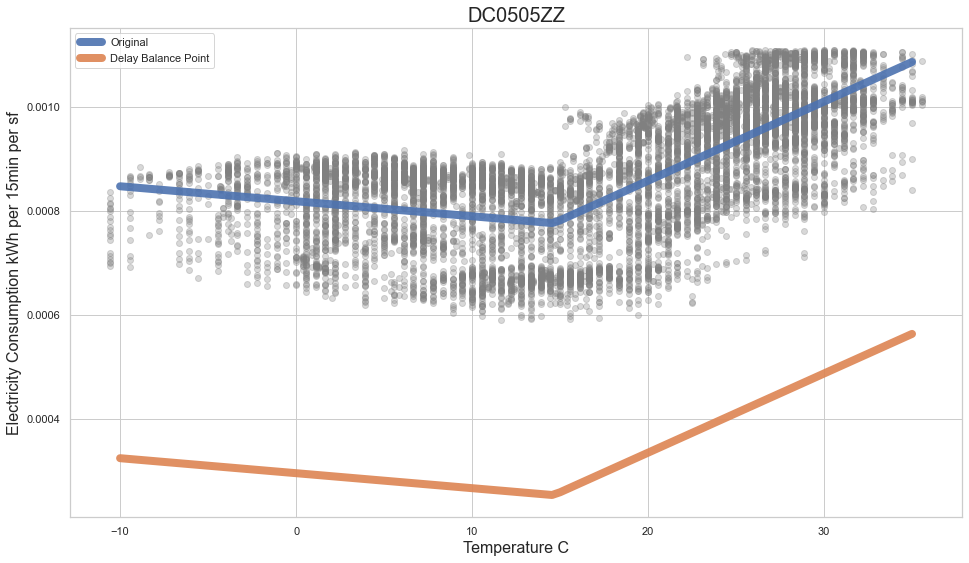

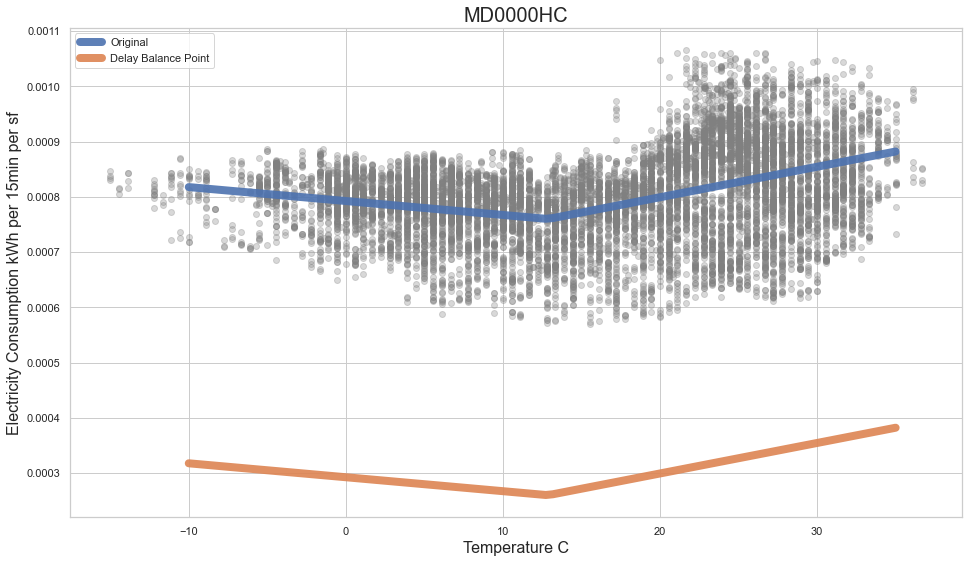

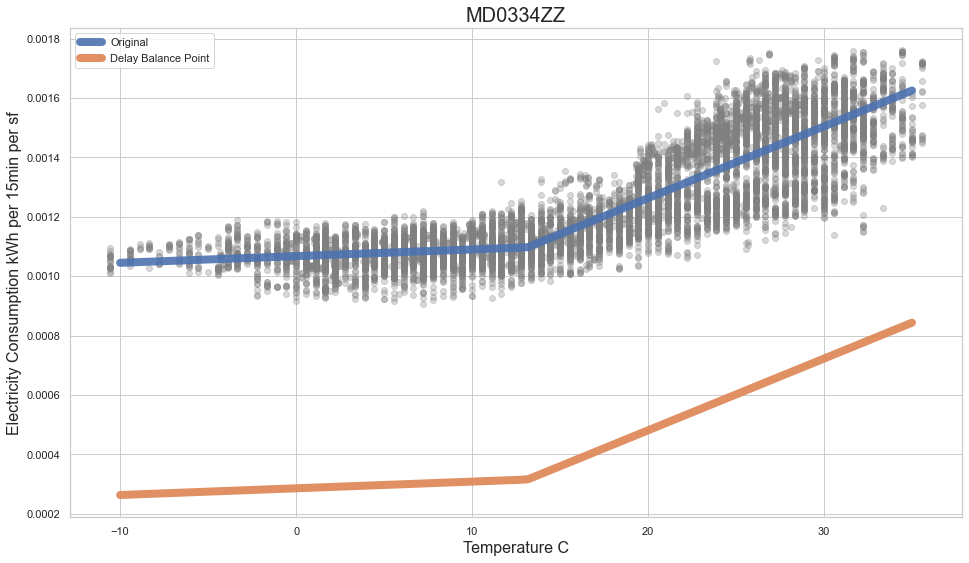

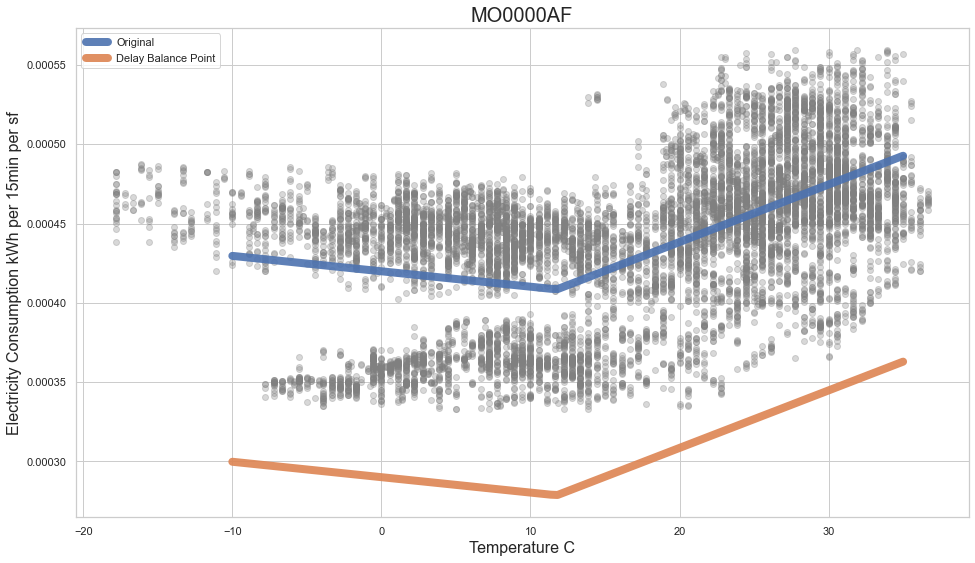

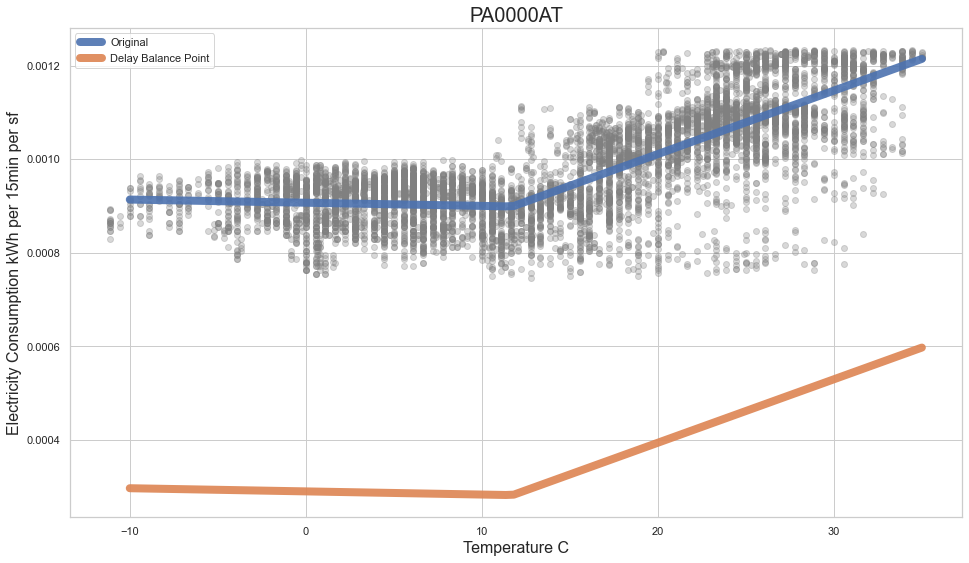

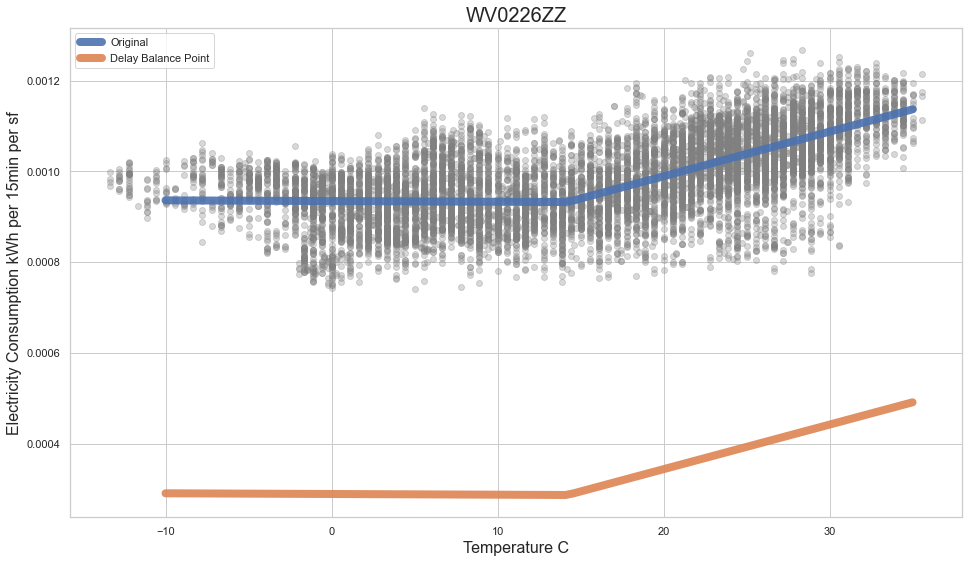

In [290]:
for i in df_occ[df_un['baseLoad'] > df_un['baseLoad'].median()].building:
    data = pd.DataFrame()
    data['w'] = w[i]
    data['e'] = e[i]
    data = data.dropna()
    data = data[~np.isin(data.index.date, holidays)]
    data = data[data.index.weekday < 5].between_time('6:00', '18:00')
    
    clustering = DBSCAN(eps=5, min_samples=8).fit(data)
    res = np.unique(clustering.labels_, return_counts=True)
    maj = res[0][np.argmax(res[1])]
    
    data['e'] = data['e'] / (building_info['floor area (sf)'][building_info['code'] == i].values[0])
    
    x, y = (data)['w'][clustering.labels_== maj], (data)['e'][clustering.labels_== maj]
    f = pwlf.PiecewiseLinFit(x, y)
    res = f.fit(segment[i])
    
    x, y = (data)['w'][clustering.labels_== maj], (data)['e'][clustering.labels_== maj]
    f = pwlf.PiecewiseLinFit(x, y)
    res = f.fit(segment[i])
    plt.subplots()
    plt.scatter((data)['w'][clustering.labels_== maj], (data)['e'][clustering.labels_== maj], c='grey', alpha=0.3)
#     plt.scatter((data)['w'][clustering.labels_== maj], f.predict((data)['w'][clustering.labels_== maj]), c='blue', alpha=0.3)
    _, balancePoint, _ = f.fit_breaks
    a1, a2 = f.slopes
    b1, b2 = f.intercepts
#     plt.scatter((data)['w'][clustering.labels_== maj], [fun2(i, balancePoint, df_occ['balancePoint'].median(), a1, b1, a2, b2) for i in (data)['w'][clustering.labels_== maj]], c='red', alpha=0.3)
    plt.title(f'{i}', fontsize=20)
    x = np.linspace(-10, 35, 100)
    plt.plot(x, [fun1(i, balancePoint, a1, b1, a2, b2) for i in x], label='Original',alpha=0.9, lw=8)
    plt.plot(x, [fun2(i, balancePoint, df_un['baseLoad'].median(), a1, b1, a2, b2) for i in x], label='Delay Balance Point',alpha=0.9, lw=8)
    plt.ylabel('Electricity Consumption kWh per 15min per sf', fontsize=16)
    plt.xlabel('Temperature C', fontsize=16)
    plt.legend()



In [288]:
df_un

building  balancePoint        slope1        slope2  intercept1  \
0   DC0010ZZ     19.106000 -1.123379e-06  1.055819e-05    0.000221   
1   DC0011ZZ     21.220725  3.746630e-06  1.214810e-05    0.000674   
2   DC0021ZZ     12.716926 -8.387452e-07  4.964693e-06    0.000213   
3   DC0078ZZ     22.975873 -6.371344e-07  1.072213e-05    0.000398   
4   DC0313ZZ     12.569220 -7.738876e-06  2.062089e-07    0.000281   
5   DC0459AF     16.451497 -1.086438e-06  5.963931e-06    0.000307   
6   DC0463ZZ     18.194875 -1.205946e-06  8.575716e-06    0.000549   
7   DC0501BC     25.634874  1.540853e-06 -6.455847e-06    0.000150   
8   DC0505ZZ     14.498291 -3.966525e-06  1.147583e-05    0.000620   
9   MD0000HC      8.729076 -6.331739e-06  4.960013e-07    0.000606   
10  MD0334ZZ     12.279714 -1.570465e-06  2.460679e-05    0.000838   
11  MD0778AG      9.974828  1.082420e-06  3.412678e-06    0.000198   
12  MO0000AF     13.019449 -1.232547e-06  2.531631e-06    0.000388   
13  MO0127ZZ     13.802287 -5.589072e-07  7.733204e-06    0.000225   
14  NC0002AE      7.049470 -1.645185e-06  1.607678e-07    0.000273   
15  PA0000AT     14.965447 -3.258004e-06  2.693147e-06    0.000727   
16  PA0144ZZ     12.919409 -1.909353e-07  1.590548e-06    0.000176   
17  VA0088ZZ      8.968505 -3.983430e-06  4.209607e-06    0.000151   
18  WV0054FP      8.807944  3.992180e-08  7.651920e-06    0.000248   
19  WV0226ZZ     18.155338 -7.562052e-07  1.260407e-05    0.000749   

    intercept2  baseLoad  
0    -0.000002  0.000216  
1     0.000496  0.000695  
2     0.000139  0.000211  
3     0.000137  0.000394  
4     0.000181  0.000271  
5     0.000191  0.000303  
6     0.000371  0.000544  
7     0.000355  0.000162  
8     0.000396  0.000611  
9     0.000546  0.000610  
10    0.000516  0.000836  
11    0.000174  0.000198  
12    0.000339  0.000386  
13    0.000111  0.000224  
14    0.000260  0.000275  
15    0.000638  0.000719  
16    0.000153  0.000176  
17    0.000077  0.000153  
18    0.000181  0.000248  
19    0.000506  0.000746

In [247]:
result = pd.DataFrame()
result['building'] = df_un[df_un['baseLoad'] > df_un['baseLoad'].median()].building
original_e, after_e = [], []

In [248]:
for i in result['building']:
    data = pd.DataFrame()
    data['w'] = w[i]
    data['e'] = e[i]
    data = data.dropna()
    data = data[~np.isin(data.index.date, holidays)]
    data = data[data.index.weekday < 5].between_time('6:00', '18:00')
    
    clustering = DBSCAN(eps=5, min_samples=8).fit(data)
    res = np.unique(clustering.labels_, return_counts=True)
    maj = res[0][np.argmax(res[1])]
    
    data['e'] = data['e'] / (building_info['floor area (sf)'][building_info['code'] == i].values[0])
    
    x, y = (data)['w'][clustering.labels_== maj], (data)['e'][clustering.labels_== maj]
    f = pwlf.PiecewiseLinFit(x, y)
    res = f.fit(segment[i])
    
    _, balancePoint, _ = f.fit_breaks
    a1, a2 = f.slopes
    b1, b2 = f.intercepts
    original = sum([fun1(i, balancePoint, a1, b1, a2, b2) for i in (data)['w']])
    original = original * (building_info['floor area (sf)'][building_info['code'] == i].values[0])
    after = sum([fun2(i, balancePoint, df_occ['baseLoad'].median(), a1, b1, a2, b2) for i in (data)['w']])
    after = after * (building_info['floor area (sf)'][building_info['code'] == i].values[0])
    original_e.append(original)
    after_e.append(after)

In [249]:
result['Original'] =  original_e
result['Good Base Load'] = after_e

In [250]:
result['Potential Energy Saving'] = round(100 * (result['Original'] - result['Good Base Load'])/result['Original'], 2)

In [256]:
len(result)

10

In [252]:
result['Potential Energy Saving'].mean()

35.825

In [268]:
result = pd.DataFrame()
result['building'] = df_occ[df_occ['baseLoad'] > df_occ['baseLoad'].quantile(0.25)].building
original_e, after_e = [], []

In [269]:
for i in result['building']:
    data = pd.DataFrame()
    data['w'] = w[i]
    data['e'] = e[i]
    data = data.dropna()
    data = data[~np.isin(data.index.date, holidays)]
    data = data[data.index.weekday < 5].between_time('6:00', '18:00')
    
    clustering = DBSCAN(eps=5, min_samples=8).fit(data)
    res = np.unique(clustering.labels_, return_counts=True)
    maj = res[0][np.argmax(res[1])]
    
    data['e'] = data['e'] / (building_info['floor area (sf)'][building_info['code'] == i].values[0])
    
    x, y = (data)['w'][clustering.labels_== maj], (data)['e'][clustering.labels_== maj]
    f = pwlf.PiecewiseLinFit(x, y)
    res = f.fit(segment[i])
    
    _, balancePoint, _ = f.fit_breaks
    a1, a2 = f.slopes
    b1, b2 = f.intercepts
    original = sum([fun1(i, balancePoint, a1, b1, a2, b2) for i in (data)['w']])
    original = original * (building_info['floor area (sf)'][building_info['code'] == i].values[0])
    after = sum([fun2(i, balancePoint, df_occ['baseLoad'].quantile(0.25), a1, b1, a2, b2) for i in (data)['w']])
    after = after * (building_info['floor area (sf)'][building_info['code'] == i].values[0])
    original_e.append(original)
    after_e.append(after)

In [270]:
result['Original'] =  original_e
result['Better Base Load'] = after_e

In [271]:
result['Potential Energy Saving'] = round(100 * (result['Original'] - result['Better Base Load'])/result['Original'], 2)

In [272]:
result

building      Original  Better Base Load  Potential Energy Saving
0   DC0010ZZ  2.907578e+06      2.623301e+06                     9.78
1   DC0011ZZ  7.333426e+06      3.169625e+06                    56.78
3   DC0078ZZ  5.311507e+05      3.690600e+05                    30.52
4   DC0313ZZ  7.806437e+05      7.040762e+05                     9.81
5   DC0459AF  1.882400e+07      1.841807e+07                     2.16
6   DC0463ZZ  4.025066e+06      2.405816e+06                    40.23
7   DC0501BC  1.131831e+06      1.049986e+06                     7.23
8   DC0505ZZ  6.309313e+06      3.151680e+06                    50.05
9   MD0000HC  8.477480e+06      4.115297e+06                    51.46
10  MD0334ZZ  6.120675e+06      2.721334e+06                    55.54
12  MO0000AF  8.314334e+06      7.499230e+06                     9.80
13  MO0127ZZ  6.243366e+06      6.097599e+06                     2.33
15  PA0000AT  4.293554e+06      1.951801e+06                    54.54
18  WV0054FP  1.145858e+06      1.135725e+06                     0.88
19  WV0226ZZ  1.891036e+06      8.205998e+05                    56.61

In [273]:
result['Potential Energy Saving'].mean()

29.181333333333335

In [274]:
result['Original'] = result['Original']/1000
result['Better Base Load'] = result['Better Base Load']/1000

Text(0.5, 0, '')

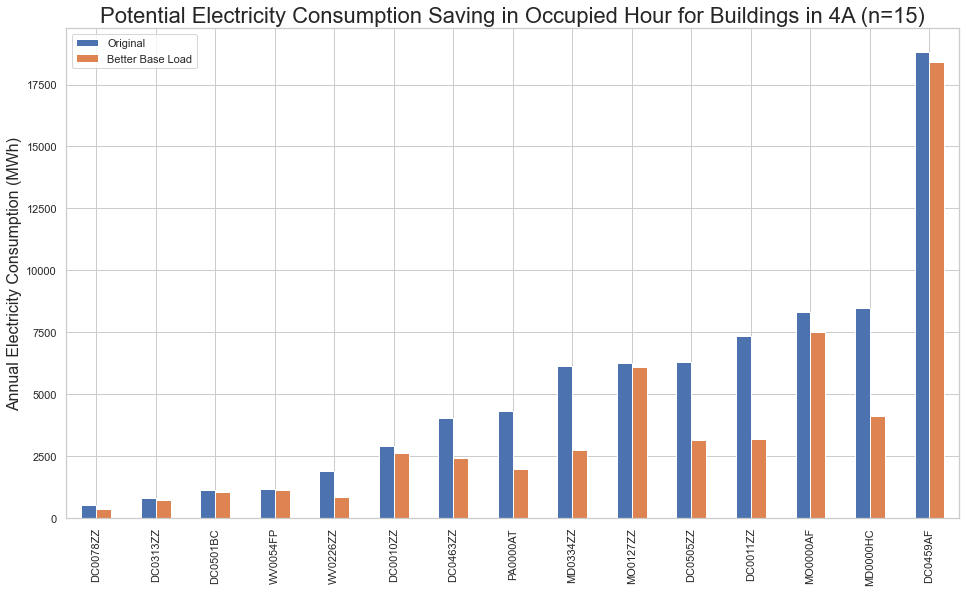

In [275]:
result.sort_values(by=['Original']).iloc[:, :-1].set_index('building').plot(kind="bar")
plt.title('Potential Electricity Consumption Saving in Occupied Hour for Buildings in 4A (n=15)', fontsize=22)
plt.ylabel('Annual Electricity Consumption (MWh)', fontsize=16)
plt.xlabel('')

# 4.08% of Electricity Consumption Saving for Occupied Hour-better

In [45]:
result.to_csv('Energy Saving after delay balance point for Occupied 4A 19.csv', index=False)

NameError: name 'result' is not defined

In [255]:
result['Original'] = result['Original']/1000
result['Good Base Load'] = result['Good Base Load']/1000

Text(0.5, 0, '')

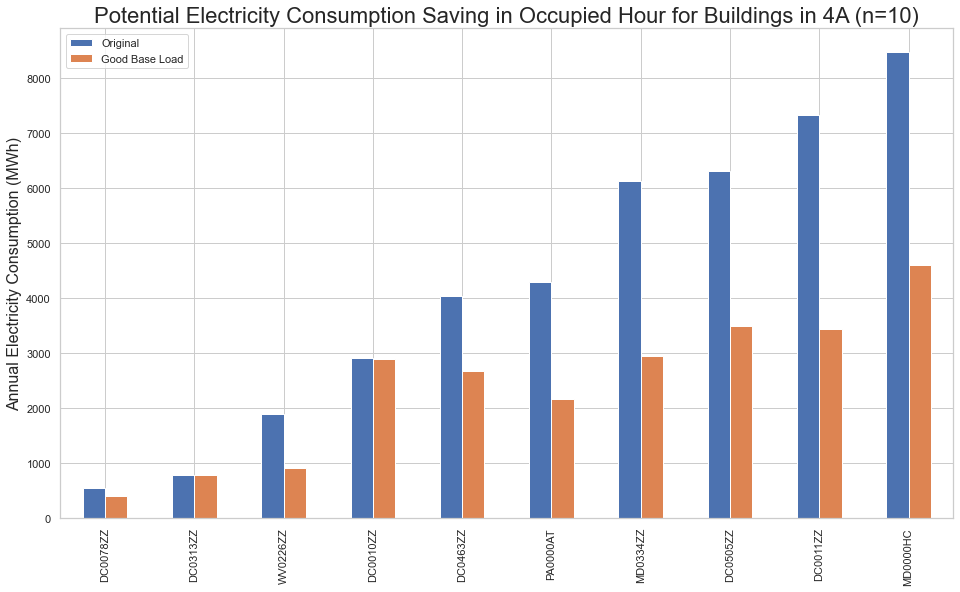

In [254]:
result.sort_values(by=['Original']).iloc[:, :-1].set_index('building').plot(kind="bar")
plt.title('Potential Electricity Consumption Saving in Occupied Hour for Buildings in 4A (n=10)', fontsize=22)
plt.ylabel('Annual Electricity Consumption (MWh)', fontsize=16)
plt.xlabel('')

# 4.4% of Electricity Consumption Saving for Occupied Hour-better

In [276]:
result = pd.DataFrame()
result['building'] = df_occ[df_occ['baseLoad'] > df_occ['baseLoad'].quantile(0.25)].building
original_e, after_e = [], []

In [277]:
for i in result['building']:
    data = pd.DataFrame()
    data['w'] = w[i]
    data['e'] = e[i]
    data = data.dropna()
    data = data[~np.isin(data.index.date, holidays)]
    data = data[data.index.weekday < 5].between_time('6:00', '18:00')
    
    clustering = DBSCAN(eps=5, min_samples=8).fit(data)
    res = np.unique(clustering.labels_, return_counts=True)
    maj = res[0][np.argmax(res[1])]
    
    data['e'] = data['e'] / (building_info['floor area (sf)'][building_info['code'] == i].values[0])
    
    x, y = (data)['w'][clustering.labels_== maj], (data)['e'][clustering.labels_== maj]
    f = pwlf.PiecewiseLinFit(x, y)
    res = f.fit(segment[i])
    
    _, balancePoint, _ = f.fit_breaks
    a1, a2 = f.slopes
    b1, b2 = f.intercepts
    original = sum([fun1(i, balancePoint, a1, b1, a2, b2) for i in (data)['w']])
    original = original * (building_info['floor area (sf)'][building_info['code'] == i].values[0])
    after = sum([fun2(i, balancePoint, df_un['balancePoint'].quantile(0.25), a1, b1, a2, b2) for i in (data)['w']])
    after = after * (building_info['floor area (sf)'][building_info['code'] == i].values[0])
    original_e.append(original)
    after_e.append(after)

In [278]:
result['Original'] =  original_e
result['Better Base Load'] = after_e

In [279]:
result['Potential Energy Saving'] = round(100 * (result['Original'] - result['Better Base Load'])/result['Original'], 2)

In [280]:
result['Potential Energy Saving'].mean()

-1680434.8706666667

In [281]:
result['Original'] = result['Original']/1000
result['Better Balance Point'] = result['Better Balance Point']/1000

KeyError: 'Better Balance Point'

In [ ]:
len(result)

Text(0.5, 0, '')

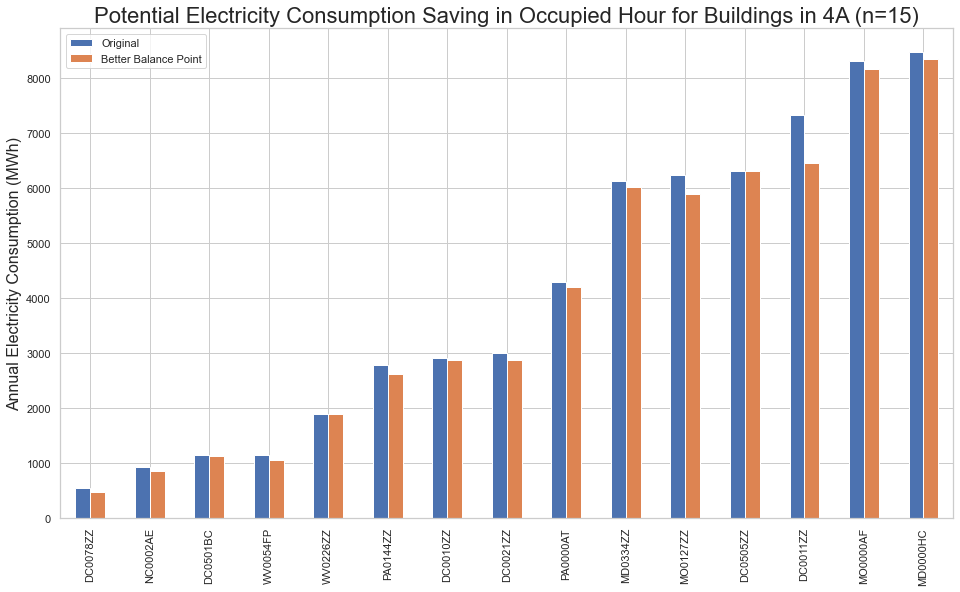

In [176]:
result.sort_values(by=['Original']).iloc[:, :-1].set_index('building').plot(kind="bar")
plt.title('Potential Electricity Consumption Saving in Occupied Hour for Buildings in 4A (n=15)', fontsize=22)
plt.ylabel('Annual Electricity Consumption (MWh)', fontsize=16)
plt.xlabel('')

# Potential Energy Saving for Unoccupied Hours

## BETTER

In [177]:
df_un = pd.read_csv('4A 19 unoccupied lean detail.csv')

In [178]:
result_un = pd.read_csv('Energy Saving after delay balance point for Unoccupied 4A 19.csv')

In [179]:
result_un

building      Original         After  Potential Energy Saving
0  DC0021ZZ  3.880820e+06  3.854593e+06                     0.68
1  DC0313ZZ  6.426182e+05  6.415331e+05                     0.17
2  MD0000HC  1.093953e+07  1.059330e+07                     3.16
3  MD0334ZZ  8.472744e+06  8.327296e+06                     1.72
4  MD0778AG  1.203131e+07  1.185914e+07                     1.43
5  MO0000AF  1.307495e+07  1.303814e+07                     0.28
6  NC0002AE  1.024134e+06  9.942684e+05                     2.92
7  PA0144ZZ  1.961956e+06  1.961264e+06                     0.04
8  VA0088ZZ  1.200871e+06  1.029204e+06                    14.30
9  WV0054FP  1.422334e+06  1.329597e+06                     6.52

In [180]:
df_un[df_un['balancePoint'] < df_un['balancePoint'].median()]

building  balancePoint        slope1        slope2  intercept1  \
2   DC0021ZZ     12.716926 -8.387452e-07  4.964693e-06    0.000213   
4   DC0313ZZ     12.569220 -7.738876e-06  2.062089e-07    0.000281   
9   MD0000HC      8.729076 -6.331739e-06  4.960013e-07    0.000606   
10  MD0334ZZ     12.279714 -1.570465e-06  2.460679e-05    0.000838   
11  MD0778AG      9.974828  1.082420e-06  3.412678e-06    0.000198   
12  MO0000AF     13.019449 -1.232547e-06  2.531631e-06    0.000388   
14  NC0002AE      7.049470 -1.645185e-06  1.607678e-07    0.000273   
16  PA0144ZZ     12.919409 -1.909353e-07  1.590548e-06    0.000176   
17  VA0088ZZ      8.968505 -3.983430e-06  4.209607e-06    0.000151   
18  WV0054FP      8.807944  3.992180e-08  7.651920e-06    0.000248   

    intercept2  baseLoad  
2     0.000139  0.000211  
4     0.000181  0.000271  
9     0.000546  0.000610  
10    0.000516  0.000836  
11    0.000174  0.000198  
12    0.000339  0.000386  
14    0.000260  0.000275  
16    0.000153  0.000176  
17    0.000077  0.000153  
18    0.000181  0.000248

In [300]:
result_un = pd.DataFrame()
result_un['building'] = df_un[df_un['baseLoad'] > df_un['baseLoad'].quantile(0.25)].building
original_e, after_e = [], []

In [301]:
for i in result_un['building']:
    data = pd.DataFrame()
    data['w'] = w[i]
    data['e'] = e[i]
    data = data.dropna()
    
    a = data[data.index.weekday >=5]
    b = data[data.index.weekday < 5].between_time('18:00', '6:00')
    data = pd.concat([a, b])
    
    clustering = DBSCAN(eps=5, min_samples=8).fit(data)
    res = np.unique(clustering.labels_, return_counts=True)
    maj = res[0][np.argmax(res[1])]
    
    data['e'] = data['e'] / (building_info['floor area (sf)'][building_info['code'] == i].values[0])
    
    x, y = (data)['w'][clustering.labels_== maj], (data)['e'][clustering.labels_== maj]
    f = pwlf.PiecewiseLinFit(x, y)
    res = f.fit(segment[i])
    
    _, balancePoint, _ = f.fit_breaks
    a1, a2 = f.slopes
    b1, b2 = f.intercepts
    original = sum([fun1(i, balancePoint, a1, b1, a2, b2) for i in (data)['w']])
    original = original * (building_info['floor area (sf)'][building_info['code'] == i].values[0])
    after = sum([fun2(i, balancePoint, df_un['baseLoad'].quantile(0.25), a1, b1, a2, b2) for i in (data)['w']])
    after = after * (building_info['floor area (sf)'][building_info['code'] == i].values[0])
    original_e.append(original)
    after_e.append(after)

In [302]:
result_un['Original'] =  original_e
result_un['Good Base Load'] = after_e
result_un['Potential Energy Saving'] = round(100 * (result_un['Original'] - result_un['Good Base Load'])/result_un['Original'], 2)

In [303]:
result_un['Original'] =  result_un['Original']/1000
result_un['Good Base Load'] = result_un['Good Base Load']/1000

In [304]:
result_un['Potential Energy Saving'].mean()

42.55866666666667

In [305]:
len(result_un)

15

Text(0.5, 0, '')

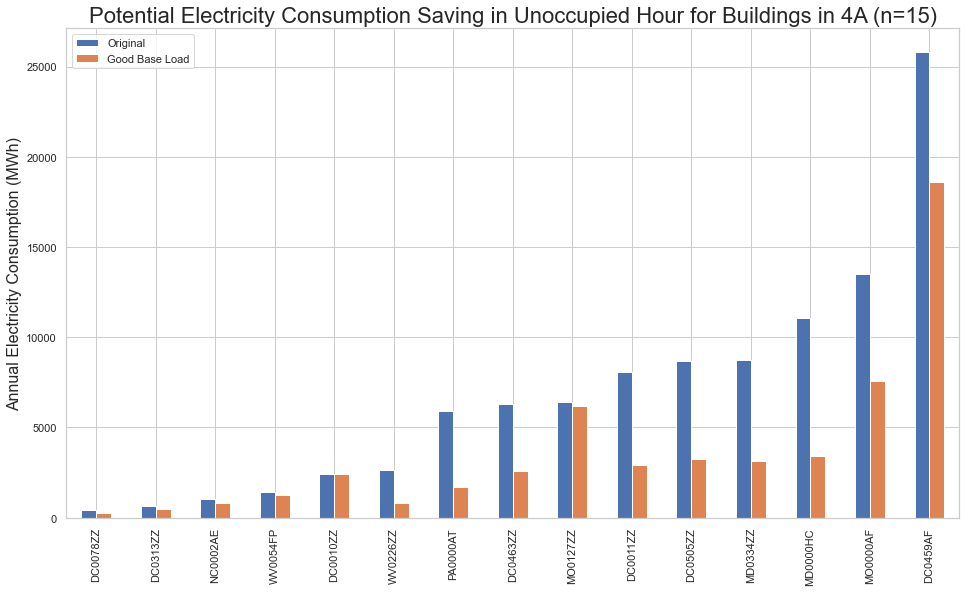

In [307]:
result_un.sort_values(by=['Original']).iloc[:, :-1].set_index('building').plot(kind="bar")
plt.title('Potential Electricity Consumption Saving in Unoccupied Hour for Buildings in 4A (n=15)', fontsize=22)
plt.ylabel('Annual Electricity Consumption (MWh)', fontsize=16)
plt.xlabel('')

## Best Balance Point Temperature

In [188]:
result_un = pd.DataFrame()
result_un['building'] = df_un[df_un['balancePoint'] < df_un['balancePoint'].quantile(0.75)].building
original_e, after_e = [], []

In [189]:
len(result_un)

15

In [190]:
for i in result_un['building']:
    data = pd.DataFrame()
    data['w'] = w[i]
    data['e'] = e[i]
    data = data.dropna()
    
    a = data[data.index.weekday >=5]
    b = data[data.index.weekday < 5].between_time('18:00', '6:00')
    data = pd.concat([a, b])
    
    clustering = DBSCAN(eps=5, min_samples=8).fit(data)
    res = np.unique(clustering.labels_, return_counts=True)
    maj = res[0][np.argmax(res[1])]
    
    data['e'] = data['e'] / (building_info['floor area (sf)'][building_info['code'] == i].values[0])
    
    x, y = (data)['w'][clustering.labels_== maj], (data)['e'][clustering.labels_== maj]
    f = pwlf.PiecewiseLinFit(x, y)
    res = f.fit(segment[i])
    
    _, balancePoint, _ = f.fit_breaks
    a1, a2 = f.slopes
    b1, b2 = f.intercepts
    original = sum([fun1(i, balancePoint, a1, b1, a2, b2) for i in (data)['w']])
    original = original * (building_info['floor area (sf)'][building_info['code'] == i].values[0])
    after = sum([fun2(i, balancePoint, df_occ['balancePoint'].quantile(0.75), a1, b1, a2, b2) for i in (data)['w']])
    after = after * (building_info['floor area (sf)'][building_info['code'] == i].values[0])
    original_e.append(original)
    after_e.append(after)

In [191]:
result_un['Original'] =  original_e
result_un['Better Balance Point Temperature'] = after_e
result_un['Potential Energy Saving'] = round(100 * (result_un['Original'] - result_un['Better Balance Point Temperature'])/result_un['Original'], 2)

In [156]:
result_un['Potential Energy Saving'].mean()

3.7800000000000002

In [192]:
result_un['Original'] =  result_un['Original']/1000
result_un['Better Balance Point Temperature'] = result_un['Better Balance Point Temperature']/1000

Text(0.5, 0, '')

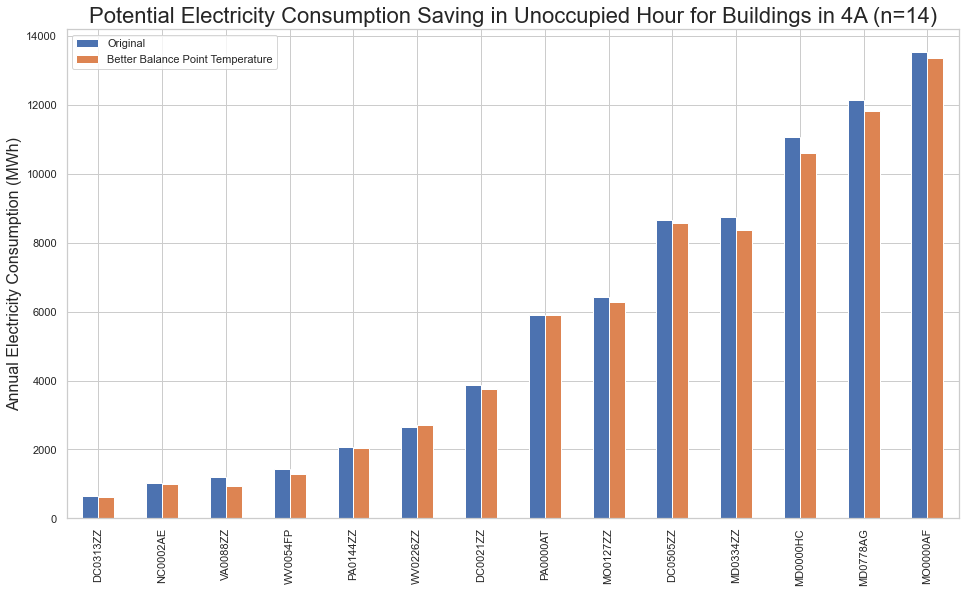

In [193]:
result_un[result_un['building'] != 'DC0459AF'].sort_values(by=['Original']).iloc[:, :-1].set_index('building').plot(kind="bar")
plt.title('Potential Electricity Consumption Saving in Unoccupied Hour for Buildings in 4A (n=14)', fontsize=22)
plt.ylabel('Annual Electricity Consumption (MWh)', fontsize=16)
plt.xlabel('')

In [157]:
result_un

building      Original  Best Balance Point Temperature  \
2   DC0021ZZ  3.883289e+06                    3.768422e+06   
4   DC0313ZZ  6.426738e+05                    6.122517e+05   
5   DC0459AF  2.582316e+07                    2.625959e+07   
8   DC0505ZZ  8.667256e+06                    8.579407e+06   
9   MD0000HC  1.105823e+07                    1.057145e+07   
10  MD0334ZZ  8.756712e+06                    8.325905e+06   
11  MD0778AG  1.213686e+07                    1.182376e+07   
12  MO0000AF  1.351594e+07                    1.337311e+07   
13  MO0127ZZ  6.421198e+06                    6.248791e+06   
14  NC0002AE  1.024206e+06                    9.873698e+05   
15  PA0000AT  5.905556e+06                    5.910242e+06   
16  PA0144ZZ  2.058635e+06                    2.035948e+06   
17  VA0088ZZ  1.200936e+06                    9.240858e+05   
18  WV0054FP  1.422919e+06                    1.291809e+06   
19  WV0226ZZ  2.653721e+06                    2.728898e+06   

    Potential Energy Saving  
2                      2.96  
4                      4.73  
5                     -1.69  
8                      1.01  
9                      4.40  
10                     4.92  
11                     2.58  
12                     1.06  
13                     2.68  
14                     3.60  
15                    -0.08  
16                     1.10  
17                    23.05  
18                     9.21  
19                    -2.83

## save 3.12% of electricity consumption in unoccupied hours

In [141]:
result_un['Potential Energy Saving'].mean()

3.122

In [144]:
result_un.to_csv('Energy Saving after delay balance point for Unoccupied 4A 19.csv', index=False)

## Concate Occupied and Unoccupied

In [145]:
occ = pd.read_csv('Energy Saving after delay balance point for Occupied 4A 19.csv')
un = pd.read_csv('Energy Saving after delay balance point for Unoccupied 4A 19.csv')

In [146]:
occ

building     Original         After  Potential Energy Saving
0  DC0011ZZ  7107598.827  6.341569e+06                    10.78
1  DC0021ZZ  2991346.396  2.948000e+06                     1.45
2  DC0078ZZ   531089.343  4.731524e+05                    10.91
3  MD0000HC  8203547.201  8.179244e+06                     0.30
4  MO0000AF  8106720.092  8.064607e+06                     0.52
5  MO0127ZZ  5406511.512  5.189739e+06                     4.01
6  NC0002AE   916052.000  8.814773e+05                     3.77
7  PA0000AT  3657204.947  3.631775e+06                     0.70
8  PA0144ZZ  2748744.015  2.664123e+06                     3.08
9  WV0054FP  1145047.854  1.084148e+06                     5.32

In [147]:
un

building      Original         After  Potential Energy Saving
0  DC0021ZZ  3.880820e+06  3.854593e+06                     0.68
1  DC0313ZZ  6.426182e+05  6.415331e+05                     0.17
2  MD0000HC  1.093953e+07  1.059330e+07                     3.16
3  MD0334ZZ  8.472744e+06  8.327296e+06                     1.72
4  MD0778AG  1.203131e+07  1.185914e+07                     1.43
5  MO0000AF  1.307495e+07  1.303814e+07                     0.28
6  NC0002AE  1.024134e+06  9.942684e+05                     2.92
7  PA0144ZZ  1.961956e+06  1.961264e+06                     0.04
8  VA0088ZZ  1.200871e+06  1.029204e+06                    14.30
9  WV0054FP  1.422334e+06  1.329597e+06                     6.52

## Compare Clean and without cleaning

In [156]:
un_ = pd.read_csv('4A 19 unoccupied lean detail without cleaning.csv')
un = pd.read_csv('4A 19 unoccupied lean detail.csv')
occ_ = pd.read_csv('4A 19 occupied lean detail without cleaning.csv')
occ = pd.read_csv('4A 19 occupied lean detail.csv')

In [161]:
df_un = pd.DataFrame()

In [162]:
df_un['building'] = un['building']
df_un['clean'] = un['balancePoint']
df_un['without clean'] = un_['balancePoint']

In [168]:
df_un['diff'] = abs(df_un['clean'] - df_un['without clean'])

In [173]:
df_un['diff'].mean()

1.680657396161795

In [174]:
df_occ = pd.DataFrame()
df_occ['building'] = occ['building']
df_occ['clean'] = occ['balancePoint']
df_occ['without clean'] = occ_['balancePoint']
df_occ['diff'] = abs(df_occ['clean'] - df_occ['without clean'])

In [175]:
df_occ['diff'].mean()

2.892197842564438